<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="center">

# Group Project
#### Arnaud Guzman-Annès | ID: 260882529
#### Ram Babu | ID: 260958970
#### Sophie Courtemanche-Martel | ID: XXXXXXX
#### Duncan Wang | ID: XXXXXXX
#### Jules Zielinski | ID: XXXXXXX
<br><br>
**Date: February 22nd, 2021**
<br><br>
## Objective:

TED talks are video recordings of influential talks given at and hosted by TED Conferences LLC. TED was founded in 1984, and has since built a reputation for spreading inspiring powerful ideas in fields ranging from tech to science to education, with its videos having garnered over 1 billion views to date.

The goal of this project is to use various features associated with TED talks -- such as the topic, speaker, conference year, and length of the talk -- to predict the number of views a TED talk may receive.


# Data preprocessing

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed as well as Scikit-Learn (V ≥0.20).

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

### About the dataset

### XXX

In [2]:
import pandas as pd
import requests
import io
    
# Downloading the csv file from my GitHub account
url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/TED/main/data/ted_main.csv"

download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
# We will use "churn" instead of "df" for replication purposes
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [4]:
df.describe()

comments     duration     film_date    languages  num_speaker  \
count  2550.000000  2550.000000  2.550000e+03  2550.000000  2550.000000   
mean    191.562353   826.510196  1.321928e+09    27.326275     1.028235   
std     282.315223   374.009138  1.197391e+08     9.563452     0.207705   
min       2.000000   135.000000  7.464960e+07     0.000000     1.000000   
25%      63.000000   577.000000  1.257466e+09    23.000000     1.000000   
50%     118.000000   848.000000  1.333238e+09    28.000000     1.000000   
75%     221.750000  1046.750000  1.412964e+09    33.000000     1.000000   
max    6404.000000  5256.000000  1.503792e+09    72.000000     5.000000   

       published_date         views  
count    2.550000e+03  2.550000e+03  
mean     1.343525e+09  1.698297e+06  
std      9.464009e+07  2.498479e+06  
min      1.151367e+09  5.044300e+04  
25%      1.268463e+09  7.557928e+05  
50%      1.340935e+09  1.124524e+06  
75%      1.423432e+09  1.700760e+06  
max      1.506092e+09  4.722711e+07

In [5]:
df['ratings'][1]

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

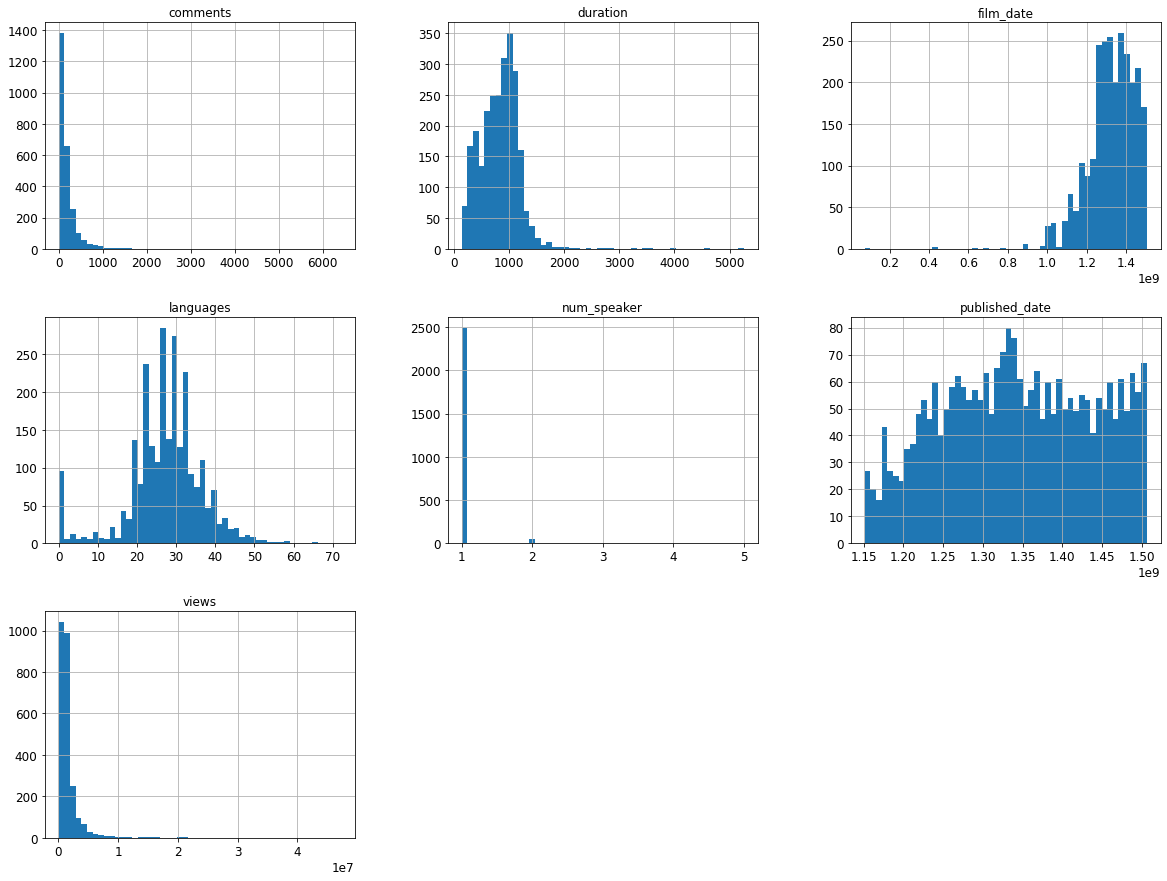

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
df_copy = df.copy()

In [8]:
#Filtering out the TED talks
df_copy = df_copy[df_copy['event'].str.contains('TED', regex=False, case=False, na=False)]
df_copy.shape

(2439, 17)

In [9]:
df_copy=df_copy.drop(["description","url"],axis=1)

In [10]:
#Converting Duration to minutes
df_copy["duration"]=round(df_copy["duration"]/60,2)

In [11]:
#Missing values
pd.isnull(df_copy).sum()

comments              0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
views                 0
dtype: int64

In [12]:
df_copy.fillna('Unknown', inplace = True)

In [13]:
df_copy['languages'].describe()

count    2439.000000
mean       27.703977
std         9.205526
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

Observations with zero languages are musicals

In [14]:
df_copy[df_copy['languages']==0]

comments  duration                         event   film_date  languages  \
58         222     13.75                       TED2005  1109289600          0   
115         27      3.57                       TED2006  1138838400          0   
135         36      4.98                TEDGlobal 2007  1181260800          0   
209         67      6.98                TEDGlobal 2007  1181088000          0   
237         43      6.43                TEDGlobal 2007  1181088000          0   
249         50      3.10                       TED2008  1202774400          0   
399        194     10.60                       TED2009  1233878400          0   
446        138      4.90                       TED2009  1233792000          0   
474        135      3.08                       TEDxUSC  1237766400          0   
512        146     13.57                       TED2006  1139443200          0   
547         46      2.35                TEDGlobal 2009  1248307200          0   
599        104     16.67                 TEDIndia 2009  1257465600          0   
696         85     23.07                TEDGlobal 2009  1248307200          0   
1053        46     16.88              TEDxThessaloniki  1301702400          0   
1060       254     15.55                 TEDxSantaCruz  1299024000          0   
1061       118     16.37                  TEDxWaterloo  1299110400          0   
1067       240     16.30             TEDxKids@Brussels  1306886400          0   
1068       223     12.82                      TEDxTeen  1301702400          0   
1079        84     11.43              TEDxBoulder 2011  1316822400          0   
1086        75      8.47                    TEDxVienna  1317686400          0   
1087       138     13.00                       TEDxYYC  1301616000          0   
1094       119     18.08                  TEDxCanberra  1316822400          0   
1104        70     10.53                        TEDxTC  1286928000          0   
1105        41      9.68               TEDxBoston 2011  1309219200          0   
1111       325      9.98                       TEDxYYC  1301616000          0   
1112        43     13.60                  TEDxBrussels  1321920000          0   
1118       195      9.72                       TEDxMIA  1315872000          0   
1125       104     22.25                      TEDxEast  1304899200          0   
1133        80      9.90        TEDxSanMigueldeAllende  1312588800          0   
1134       245     18.17                      TEDxEast  1320969600          0   
1141        70     18.63                     TEDxIslay  1303516800          0   
1144        15      3.32  TEDxGreatPacificGarbagePatch  1289001600          0   
1149        80     11.15                   TEDxPhoenix  1320969600          0   
1156        90     20.90                 TEDxAsheville  1321142400          0   
1169       123     15.88                   TEDxPhoenix  1320969600          0   
1171       152      6.27                        TED-Ed  1321488000          0   
1172       428     12.13                        TED-Ed  1331510400          0   
1173        62      8.47                        TED-Ed  1331510400          0   
1174       145      7.53                        TED-Ed  1320192000          0   
1178        84     11.05                 TEDxCambridge  1321660800          0   
1179        99     19.85               TEDxPortofSpain  1320969600          0   
1184        59     17.37                 TEDxVancouver  1321056000          0   
1191        86      5.63                TEDxPittsburgh  1321660800          0   
1193        76      6.03                        TED-Ed  1333324800          0   
1198       175      5.08                        TED-Ed  1320969600          0   
1212       224      5.47                        TED-Ed  1335312000          0   
1223        59     18.07                   TEDxPhoenix  1320969600          0   
1229        73     12.82                       TEDxSMU  1322870400          0   
1237        67     11.62             

In [15]:
#Indexing the rows
df_copy.reset_index(inplace=True)

In [16]:
from collections import defaultdict
rating_data = defaultdict(list)

In [17]:
import ast
rating_names = set()
for index, row in df_copy.iterrows():
    rating = ast.literal_eval(row['ratings'])
    for item in rating:
        rating_names.add(item['name'])

In [18]:
rating_names

{'Beautiful',
 'Confusing',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing'}

In [19]:
#Extracting ratings

rating_data = defaultdict(list)
for index, row in df_copy.iterrows():
    rating = ast.literal_eval(row['ratings'])
    rating_data['ID'].append(row['index'])
    names = set()
    for item in rating:
        rating_data[item['name']].append(item['count'])
        names.add(item['name'])

rating_data = pd.DataFrame(rating_data)

rating_data.head()

ID  Funny  Beautiful  Ingenious  Courageous  Longwinded  Confusing  \
0   0  19645       4573       6073        3253         387        242   
1   1    544         58         56         139         113         62   
2   2    964         60        183          45          78         27   
3   3     59        291        105         760          53         32   
4   4   1390        942       3202         318         110         72   

   Informative  Fascinating  Unconvincing  Persuasive  Jaw-dropping    OK  \
0         7346        10581           300       10704          4439  1174   
1          443          132           258         268           116   203   
2          395          166           104         230            54   146   
3          380          132            36         460           230    85   
4         5433         4606            67        2542          3736   248   

   Obnoxious  Inspiring  
0        209      24924  
1        131        413  
2        142        230  
3         35       1070  
4         61       2893

In [20]:
#Extracting tags

tags_data = defaultdict(list)
for index, row in df_copy.iterrows():
    tags = ast.literal_eval(row['tags'])
    for item in tags:
        tags_data['ID'].append(row['index'])
        tags_data['tags'].append(item)

tags_data = pd.DataFrame(tags_data)

In [21]:
tags_data[tags_data['ID']==1]

ID                tags
7    1  alternative energy
8    1                cars
9    1      climate change
10   1             culture
11   1         environment
12   1       global issues
13   1             science
14   1      sustainability
15   1          technology

In [22]:
#Extracting related talks

df_copy['related_views'] = 0
df_copy['related_duration'] = 0
for index, row in df_copy.iterrows():
    rel = row['related_talks'].split(',')
    ctr1 = 0
    tot1 = 0
    ctr2 = 0
    tot2 = 0
    for views in rel:
        if 'viewed_count' in views:
            view = views.split(':')
            view[1] = view[1].replace("]", "")
            view[1] = view[1].replace(" ", "")
            view[1] = view[1].replace("}", "")
            tot1+=int(view[1])
            ctr1+=1
        if 'duration' in views:
            view = views.split(':')
            view[1] = view[1].replace("]", "")
            view[1] = view[1].replace(" ", "")
            view[1] = view[1].replace("}", "")
            tot2+=int(view[1])
            ctr2+=1
    df_copy['related_views'][index] = tot1/ctr1
    df_copy['related_duration'][index] = tot2/ctr2

<ipython-input-22-3e2c6d04c718>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['related_views'][index] = tot1/ctr1
<ipython-input-22-3e2c6d04c718>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['related_duration'][index] = tot2/ctr2


In [23]:
df_copy.head()

index  comments  duration    event   film_date  languages   main_speaker  \
0      0      4553     19.40  TED2006  1140825600         60   Ken Robinson   
1      1       265     16.28  TED2006  1140825600         43        Al Gore   
2      2       124     21.43  TED2006  1140739200         26    David Pogue   
3      3       200     18.60  TED2006  1140912000         35  Majora Carter   
4      4       593     19.83  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title     views  related_views  related_duration  
0      Do schools kill creativity?  47227110        3027062               921  
1      Averting the climate crisis   3200520        1118767              1096  
2                 Simplicity sells   1636292        1846195               915  
3              Greening the ghetto   1697550         776189               748  
4  The best stats you've ever seen  12005869        1907337               943

In [24]:
df_copy['event_category'] = 'Other'

for i in range(len(df_copy)):
    if df_copy['event'][i][0:5]=='TED20':
        df_copy['event_category'][i] = 'TED2000s'
    elif df_copy['event'][i][0:5]=='TED19':
        df_copy['event_category'][i] = 'TED1900s'
    elif df_copy['event'][i][0:4]=='TEDx':
        df_copy['event_category'][i] = "TEDx"
    elif df_copy['event'][i][0:7]=='TED@BCG':
        df_copy['event_category'][i] = 'TED@BCG'
    elif df_copy['event'][i][0:4]=='TED@':
        df_copy['event_category'][i] = "TED@"
    elif df_copy['event'][i][0:8]=='TEDSalon':
        df_copy['event_category'][i] = "TEDSalon"
    elif df_copy['event'][i][0:9]=='TEDGlobal':
        df_copy['event_category'][i] = 'TEDGlobal'
    elif df_copy['event'][i][0:8]=='TEDWomen':
        df_copy['event_category'][i] = 'TEDWomen'
    elif df_copy['event'][i][0:6]=='TEDMED':
        df_copy['event_category'][i] = 'TEDMED'
    elif df_copy['event'][i][0:3]=='TED':
        df_copy['event_category'][i] = 'TEDOther'

<ipython-input-24-fdf0cfe3cd18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['event_category'][i] = 'TED2000s'
<ipython-input-24-fdf0cfe3cd18>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['event_category'][i] = 'TEDGlobal'
<ipython-input-24-fdf0cfe3cd18>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['event_category'][i] = "TEDSalon"
<ipython-input-24-fdf0cfe3cd18>:7: SettingWithCopyWarning: 
A value

In [25]:
import datetime

df_copy['published_date'] = df_copy['published_date'].apply(lambda x: datetime.date.fromtimestamp(int(x)))
df_copy['day'] = df_copy['published_date'].apply(lambda x: x.weekday())
df_copy['month'] = df_copy['published_date'].apply(lambda x: x.month)
df_copy['year'] = df_copy['published_date'].apply(lambda x: x.year)
df_copy['film_date'] = df_copy['film_date'].apply(lambda x: datetime.date.fromtimestamp(int(x)))
df_copy['day_film'] = df_copy['film_date'].apply(lambda x: x.weekday())
df_copy['month_film'] = df_copy['film_date'].apply(lambda x: x.month)
df_copy['year_film'] = df_copy['film_date'].apply(lambda x: x.year)

In [26]:
to_cat = {"day":   {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thurday", 4: "Friday", 5: "Saturday",
                    6: "Sunday" },
          "day_film":   {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thurday", 4: "Friday", 5: "Saturday",
                    6: "Sunday" }}

df_copy.replace(to_cat, inplace=True)

In [27]:
df_copy.head()

index  comments  duration    event   film_date  languages   main_speaker  \
0      0      4553     19.40  TED2006  2006-02-24         60   Ken Robinson   
1      1       265     16.28  TED2006  2006-02-24         43        Al Gore   
2      2       124     21.43  TED2006  2006-02-23         26    David Pogue   
3      3       200     18.60  TED2006  2006-02-25         35  Majora Carter   
4      4       593     19.83  TED2006  2006-02-21         48   Hans Rosling   

                                            name  num_speaker published_date  \
0      Ken Robinson: Do schools kill creativity?            1     2006-06-26   
1           Al Gore: Averting the climate crisis            1     2006-06-26   
2                  David Pogue: Simplicity sells            1     2006-06-26   
3             Majora Carter: Greening the ghetto            1     2006-06-26   
4  Hans Rosling: The best stats you've ever seen            1     2006-06-27   

   ...     views related_views related_duration event_category      day  \
0  ...  47227110       3027062              921       TED2000s   Monday   
1  ...   3200520       1118767             1096       TED2000s   Monday   
2  ...   1636292       1846195              915       TED2000s   Monday   
3  ...   1697550        776189              748       TED2000s   Monday   
4  ...  12005869       1907337              943       TED2000s  Tuesday   

   month  year  day_film month_film year_film  
0      6  2006    Friday          2      2006  
1      6  2006    Friday          2      2006  
2      6  2006   Thurday          2      2006  
3      6  2006  Saturday          2      2006  
4      6  2006   Tuesday          2      2006  

[5 rows x 25 columns]

In [28]:
temp = tags_data.groupby(['tags']).count()
temp = temp.sort_values(by='ID',ascending=False)

In [29]:
temp.head(60)

ID
tags                 
technology        701
science           534
global issues     478
culture           473
TEDx              450
design            397
business          332
entertainment     276
health            233
innovation        224
society           222
social change     216
art               206
future            191
communication     189
biology           180
creativity        179
humanity          176
collaboration     173
medicine          160
economics         157
activism          154
environment       154
brain             149
community         147
education         144
TED Fellows       142
history           141
invention         139
music             135
children          135
health care       132
politics          124
cities            118
storytelling      116
women             116
psychology        113
identity          112
war               112
performance       111
nature            110
engineering       109
computers         106
Africa            105
humor             100
animals            96
life               95
personal growth    94
inequality         93
data               93
medical research   91
exploration        91
government         90
photography        87
neuroscience       86
climate change     82
visualizations     82
Internet           82
architecture       80
live music         78

In [30]:
#Creating Tag Categories

df_copy['Technology/Science'] = 0
df_copy['Humanity'] = 0
df_copy['Global Issues'] = 0
df_copy['Art/Creativity'] = 0
df_copy['Business'] = 0
df_copy['Entertainment'] = 0
df_copy['Health'] = 0
df_copy['Communication'] = 0
df_copy['Education']=0

Tech = ['technology','future','comuters','science','invention','research']
Humanity = ['community','society','social change','humanity','culture']
Global_Issues = ['global issues','activism','politics','inequality','environment','climate change']
Art = ['design','art','innovation','creativity','brain']
Business = ['business','economics']
Entertainment = ['entertainment','media','sports']
Health = ['health','biollogy','medicine','health care','medical research']
Communication = ['communication','collaboration']
Education = ['children','education','teaching','parenting']


for i in range(len(tags_data)):
    index = tags_data['ID'][i]
    if tags_data['tags'][i] in Tech:
        df_copy['Technology/Science'][index]=1
    if tags_data['tags'][i] in Humanity:
        df_copy['Humanity'][index]=1
    if tags_data['tags'][i] in Global_Issues:
        df_copy['Global Issues'][index]=1
    if tags_data['tags'][i] in Art:
        df_copy['Art/Creativity'][index]=1
    if tags_data['tags'][i] in Business:
        df_copy['Business'][index]=1
    if tags_data['tags'][i] in Entertainment:
        df_copy['Entertainment'][index]=1
    if tags_data['tags'][i] in Health:
        df_copy['Health'][index]=1
    if tags_data['tags'][i] in Communication:
        df_copy['Communication'][index]=1
    if tags_data['tags'][i] in Education:
        df_copy['Education'][index]=1

<ipython-input-30-620df9b56da4>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Education'][index]=1
<ipython-input-30-620df9b56da4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Art/Creativity'][index]=1
<ipython-input-30-620df9b56da4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Humanity'][index]=1
<ipython-input-30-620df9b56da4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [31]:
df_copy = df_copy.drop(['index','comments', 'event', 'film_date', 'main_speaker', 'name', 'published_date', 'ratings', 
           'related_talks', 'tags', 'title','speaker_occupation'], 1)

In [32]:
df_copy.head()

duration  languages  num_speaker     views  related_views  \
0     19.40         60            1  47227110        3027062   
1     16.28         43            1   3200520        1118767   
2     21.43         26            1   1636292        1846195   
3     18.60         35            1   1697550         776189   
4     19.83         48            1  12005869        1907337   

   related_duration event_category      day  month  year  ... year_film  \
0               921       TED2000s   Monday      6  2006  ...      2006   
1              1096       TED2000s   Monday      6  2006  ...      2006   
2               915       TED2000s   Monday      6  2006  ...      2006   
3               748       TED2000s   Monday      6  2006  ...      2006   
4               943       TED2000s  Tuesday      6  2006  ...      2006   

   Technology/Science  Humanity  Global Issues  Art/Creativity  Business  \
0                   0         1              0               1         0   
1                   1         1              1               0         0   
2                   1         0              0               0         0   
3                   0         0              1               0         1   
4                   0         0              1               0         1   

   Entertainment  Health  Communication  Education  
0              0       0              0          1  
1              0       0              0          0  
2              1       0              0          0  
3              0       0              0          0  
4              0       1              0          0  

[5 rows x 22 columns]

In [33]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df_copy, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preparing data for Machine Learning Algorithms

In [34]:
df_copy.head()

duration  languages  num_speaker     views  related_views  \
0     19.40         60            1  47227110        3027062   
1     16.28         43            1   3200520        1118767   
2     21.43         26            1   1636292        1846195   
3     18.60         35            1   1697550         776189   
4     19.83         48            1  12005869        1907337   

   related_duration event_category      day  month  year  ... year_film  \
0               921       TED2000s   Monday      6  2006  ...      2006   
1              1096       TED2000s   Monday      6  2006  ...      2006   
2               915       TED2000s   Monday      6  2006  ...      2006   
3               748       TED2000s   Monday      6  2006  ...      2006   
4               943       TED2000s  Tuesday      6  2006  ...      2006   

   Technology/Science  Humanity  Global Issues  Art/Creativity  Business  \
0                   0         1              0               1         0   
1                   1         1              1               0         0   
2                   1         0              0               0         0   
3                   0         0              1               0         1   
4                   0         0              1               0         1   

   Entertainment  Health  Communication  Education  
0              0       0              0          1  
1              0       0              0          0  
2              1       0              0          0  
3              0       0              0          0  
4              0       1              0          0  

[5 rows x 22 columns]

In [35]:
#Splitting data for testing purpose

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_copy, test_size=0.2, random_state=42)

In [37]:
train_copy = train_set.copy()

In [38]:
train_labels = train_copy['views'].copy()
train_copy = train_copy.drop(["views"], axis=1)

In [41]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 383 to 860
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            1951 non-null   float64
 1   languages           1951 non-null   int64  
 2   num_speaker         1951 non-null   int64  
 3   related_views       1951 non-null   int64  
 4   related_duration    1951 non-null   int64  
 5   event_category      1951 non-null   object 
 6   day                 1951 non-null   object 
 7   month               1951 non-null   int64  
 8   year                1951 non-null   int64  
 9   day_film            1951 non-null   object 
 10  month_film          1951 non-null   int64  
 11  year_film           1951 non-null   int64  
 12  Technology/Science  1951 non-null   int64  
 13  Humanity            1951 non-null   int64  
 14  Global Issues       1951 non-null   int64  
 15  Art/Creativity      1951 non-null   int64  
 16  Busin

In [42]:
train_num = train_copy.drop(["event_category","day","month","day_film","month_film"], axis=1)
train_cat = train_copy[["event_category","day","month","day_film","month_film"]]

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(train_cat)
cat_1hot

<1951x48 sparse matrix of type '<class 'numpy.float64'>'
	with 9755 stored elements in Compressed Sparse Row format>

In [45]:
cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
train_num_tr = num_pipeline.fit_transform(train_num)

In [47]:
train_num_tr

array([[-0.57910177, -0.06570358, -0.12196058, ..., -0.38424869,
        -0.37274326,  3.09891285],
       [ 0.5586885 , -0.60657987, -0.12196058, ..., -0.38424869,
         2.68281177, -0.32269381],
       [ 0.24112343,  0.04247168, -0.12196058, ..., -0.38424869,
        -0.37274326, -0.32269381],
       ...,
       [ 0.73108097,  0.47517271, -0.12196058, ...,  2.60248119,
        -0.37274326, -0.32269381],
       [-0.85674438, -0.49840461, -0.12196058, ..., -0.38424869,
        -0.37274326, -0.32269381],
       [-1.05091273,  0.2588222 , -0.12196058, ..., -0.38424869,
         2.68281177, -0.32269381]])

In [48]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_copy.drop(["event_category","day","month","day_film","month_film"], axis=1))
cat_attribs = ["event_category","day","month","day_film","month_film"]

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attribs),
        ("num", num_pipeline, num_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train_copy)

In [49]:
train_prepared

array([[ 0.        ,  1.        ,  0.        , ..., -0.38424869,
        -0.37274326,  3.09891285],
       [ 0.        ,  0.        ,  0.        , ..., -0.38424869,
         2.68281177, -0.32269381],
       [ 0.        ,  0.        ,  0.        , ..., -0.38424869,
        -0.37274326, -0.32269381],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  2.60248119,
        -0.37274326, -0.32269381],
       [ 0.        ,  0.        ,  0.        , ..., -0.38424869,
        -0.37274326, -0.32269381],
       [ 0.        ,  1.        ,  0.        , ..., -0.38424869,
         2.68281177, -0.32269381]])

# Select and train a model 

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [51]:
some_data = train_copy.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 722304. 1234816. 1169280.  453504. 2997504.]


In [52]:
from sklearn.metrics import mean_squared_error

ted_view_preds = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, ted_view_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2172692.6173894913

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor()

In [58]:
ted_view_preds = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, ted_view_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [60]:
print("Predictions:", tree_reg.predict(some_data_prepared))

Predictions: [ 338831.  721266.  338346. 1035995. 1655352.]
